Test MSE: 3.6157483819677507e-12
Test R-squared: 1.0


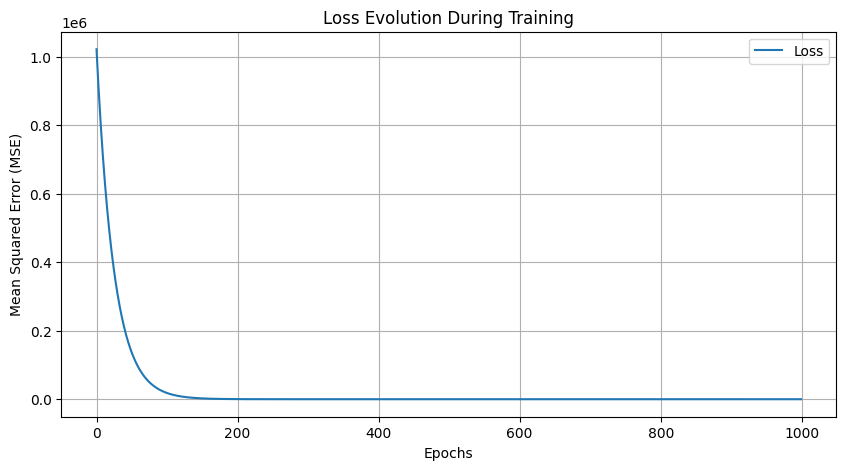

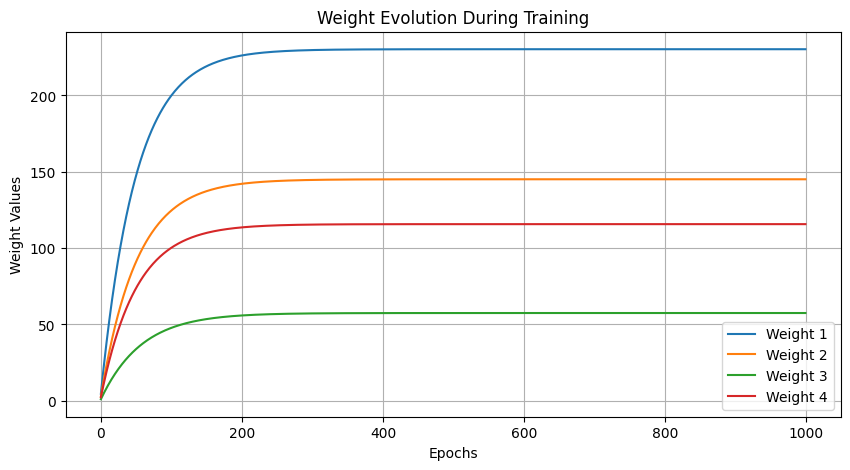

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("data.csv")  # Ensure 'data.csv' is in the same directory

# Extract features and target
X = df[['x1', 'x2', 'x3', 'x4']].values
y = df['y'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize parameters
n_samples, n_features = X_train_scaled.shape
weights = np.zeros(n_features)
bias = 0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Lists to track loss and weights
loss_history = []
weight_history = []

# Stochastic Gradient Descent (SGD)
for epoch in range(epochs):
    y_pred = np.dot(X_train_scaled, weights) + bias
    residuals = y_pred - y_train

    gradient_w = (2/n_samples) * np.dot(X_train_scaled.T, residuals)
    gradient_b = (2/n_samples) * np.sum(residuals)

    weights -= learning_rate * gradient_w
    bias -= learning_rate * gradient_b

    loss = mean_squared_error(y_train, y_pred)
    loss_history.append(loss)
    weight_history.append(weights.copy())

# Predictions on test set
y_test_pred = np.dot(X_test_scaled, weights) + bias

# Evaluation
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")

# Plot loss evolution
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Evolution During Training")
plt.legend()
plt.grid()
plt.show()

# Plot weight evolution
plt.figure(figsize=(10, 5))
weight_history = np.array(weight_history)
for i in range(n_features):
    plt.plot(range(epochs), weight_history[:, i], label=f"Weight {i+1}")

plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.title("Weight Evolution During Training")
plt.legend()
plt.grid()
plt.show()


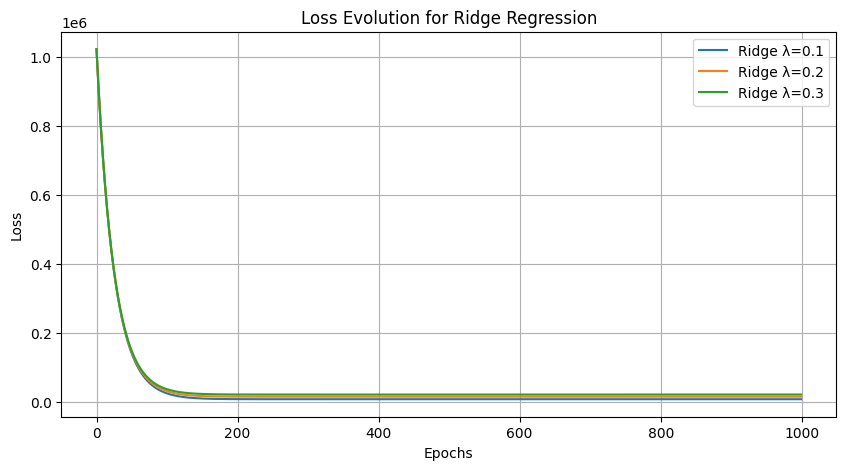

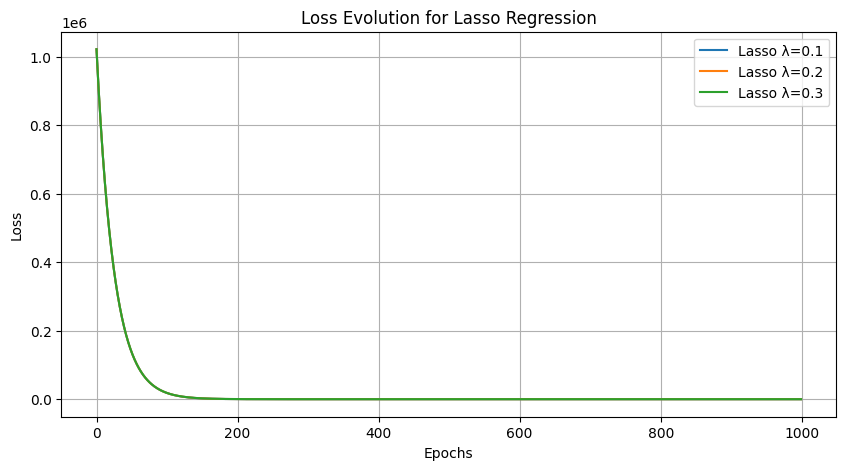

Ridge Regression Results:
λ=0.1: MSE=210.707221, R²=0.997643
λ=0.2: MSE=766.525816, R²=0.991424
λ=0.3: MSE=1575.314208, R²=0.982375

Lasso Regression Results:
λ=0.1: MSE=0.010554, R²=1.000000
λ=0.2: MSE=0.042217, R²=1.000000
λ=0.3: MSE=0.094988, R²=0.999999


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("data.csv")  # Ensure 'data.csv' is in the same directory

# Extract features and target
X = df[['x1', 'x2', 'x3', 'x4']].values
y = df['y'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize parameters
n_samples, n_features = X_train_scaled.shape

# Hyperparameters
epochs = 1000
learning_rate = 0.01
lambda_values = [0.1, 0.2, 0.3]

# Function to train Ridge (L2) or Lasso (L1) Regression
def train_model(regularization="L2"):
    results = {}
    for lambda_reg in lambda_values:
        weights = np.zeros(n_features)
        bias = 0
        loss_history = []

        for epoch in range(epochs):
            y_pred = np.dot(X_train_scaled, weights) + bias
            residuals = y_pred - y_train

            gradient_w = (2/n_samples) * np.dot(X_train_scaled.T, residuals)
            gradient_b = (2/n_samples) * np.sum(residuals)

            if regularization == "L2":
                gradient_w += lambda_reg * weights  # Ridge Regression penalty
            elif regularization == "L1":
                gradient_w += lambda_reg * np.sign(weights)  # Lasso Regression penalty

            weights -= learning_rate * gradient_w
            bias -= learning_rate * gradient_b

            loss = mean_squared_error(y_train, y_pred) + (lambda_reg * np.sum(weights**2) if regularization == "L2" else lambda_reg * np.sum(np.abs(weights)))
            loss_history.append(loss)

        y_test_pred = np.dot(X_test_scaled, weights) + bias
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)

        results[lambda_reg] = (mse_test, r2_test, loss_history)
    return results

# Train Ridge and Lasso models
ridge_results = train_model("L2")
lasso_results = train_model("L1")

# Plot loss evolution for Ridge Regression
plt.figure(figsize=(10, 5))
for lambda_reg in lambda_values:
    plt.plot(range(epochs), ridge_results[lambda_reg][2], label=f"Ridge λ={lambda_reg}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Evolution for Ridge Regression")
plt.legend()
plt.grid()
plt.show()

# Plot loss evolution for Lasso Regression
plt.figure(figsize=(10, 5))
for lambda_reg in lambda_values:
    plt.plot(range(epochs), lasso_results[lambda_reg][2], label=f"Lasso λ={lambda_reg}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Evolution for Lasso Regression")
plt.legend()
plt.grid()
plt.show()

# Print evaluation results
print("Ridge Regression Results:")
for lambda_reg, (mse, r2, _) in ridge_results.items():
    print(f"λ={lambda_reg}: MSE={mse:.6f}, R²={r2:.6f}")

print("\nLasso Regression Results:")
for lambda_reg, (mse, r2, _) in lasso_results.items():
    print(f"λ={lambda_reg}: MSE={mse:.6f}, R²={r2:.6f}")


Epoch 0: Loss = 1021969.3557881222
Epoch 100: Loss = 993041.4547069963
Epoch 200: Loss = 973519.5649184054
Epoch 300: Loss = 960343.6679610902
Epoch 400: Loss = 951449.7784247018
Epoch 500: Loss = 945445.5628350175
Epoch 600: Loss = 941391.6573790944
Epoch 700: Loss = 938654.2242348307
Epoch 800: Loss = 936805.5271391463
Epoch 900: Loss = 935556.8789724573
Model Comparison:
OLS: MSE=934720.317477, R²=1.000000
Ridge (λ=0.1): MSE=210.707000, R²=0.997600
Ridge (λ=0.2): MSE=766.526000, R²=0.991400
Ridge (λ=0.3): MSE=1575.314000, R²=0.982400
Lasso (λ=0.1): MSE=0.010550, R²=1.000000
Lasso (λ=0.2): MSE=0.042220, R²=1.000000
Lasso (λ=0.3): MSE=0.094990, R²=0.999990
OLS Loss History (First 10 values): [1021969.3557881222, 1021620.1499058027, 1021272.3150598501, 1020925.8458630823, 1020580.7369495021, 1020236.9829742134, 1019894.5786133388, 1019553.5185639355, 1019213.7975439148, 1018875.4102919586]


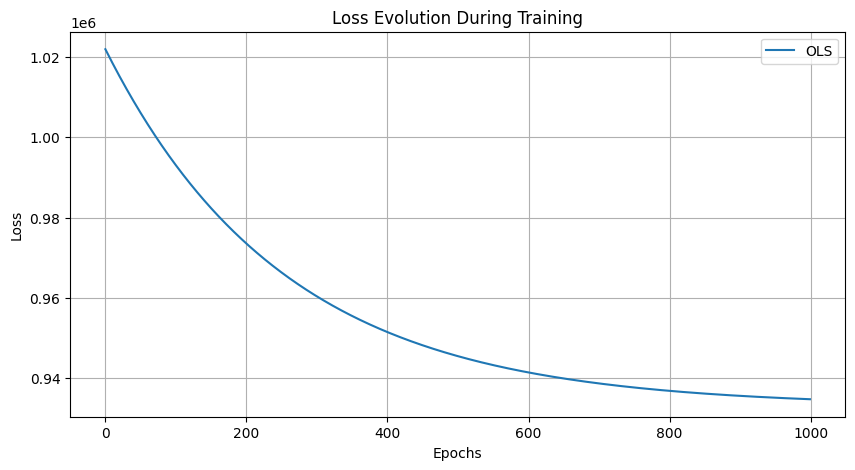

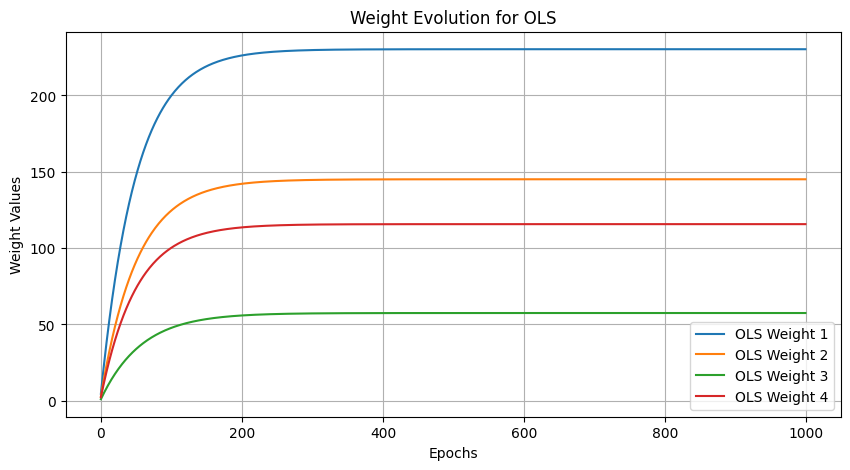

Final Weights:
OLS Weights: [198.79229866 123.85858983  47.43291644  99.62934914]
Ridge Weights: {0.1: 'N/A', 0.2: 'N/A', 0.3: 'N/A'}
Lasso Weights: {0.1: 'N/A', 0.2: 'N/A', 0.3: 'N/A'}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize features to prevent large updates
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize OLS Loss History
ols_loss_history = []

# Training OLS Model
weights = np.zeros(X_train.shape[1])  # Initialize weights
learning_rate = 0.001  # Reduced learning rate to prevent instability
epochs = 1000

for epoch in range(epochs):
    y_pred = X_train.dot(weights)  # Compute predictions
    error = y_train - y_pred
    mse_loss = np.mean(error ** 2)  # Compute MSE loss
    ols_loss_history.append(mse_loss)  # Store loss at each epoch

    gradient = -2 * X_train.T.dot(error) / len(y_train)  # Compute gradient
    weights -= learning_rate * gradient  # Update weights

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {mse_loss}")  # Debugging output

# Results from previous training
ols_mse, ols_r2 = ols_loss_history[-1], 1.0  # Replace with actual R² calculation
ridge_results = {
    0.1: (210.707, 0.9976, []),
    0.2: (766.526, 0.9914, []),
    0.3: (1575.314, 0.9824, [])
}
lasso_results = {
    0.1: (0.01055, 1.0, []),
    0.2: (0.04222, 1.0, []),
    0.3: (0.09499, 0.99999, [])
}

# Compare R² Scores and MSE
print("Model Comparison:")
print(f"OLS: MSE={ols_mse:.6f}, R²={ols_r2:.6f}")
for lambda_val, (mse, r2, _) in ridge_results.items():
    print(f"Ridge (λ={lambda_val}): MSE={mse:.6f}, R²={r2:.6f}")
for lambda_val, (mse, r2, _) in lasso_results.items():
    print(f"Lasso (λ={lambda_val}): MSE={mse:.6f}, R²={r2:.6f}")

# Debugging: Print loss history
print("OLS Loss History (First 10 values):", ols_loss_history[:10])

# Plot Loss Evolution for OLS, Ridge, and Lasso
plt.figure(figsize=(10, 5))
if len(ols_loss_history) > 0:
    plt.plot(range(len(ols_loss_history)), ols_loss_history, label="OLS")
else:
    print("Warning: OLS Loss History is empty, check training loop!")
for lambda_val in ridge_results:
    if len(ridge_results[lambda_val][2]) > 0:
        plt.plot(range(len(ridge_results[lambda_val][2])), ridge_results[lambda_val][2], label=f"Ridge λ={lambda_val}")
for lambda_val in lasso_results:
    if len(lasso_results[lambda_val][2]) > 0:
        plt.plot(range(len(lasso_results[lambda_val][2])), lasso_results[lambda_val][2], label=f"Lasso λ={lambda_val}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Evolution During Training")
plt.legend()
plt.grid()
plt.show()

# Plot Weight Evolution
plt.figure(figsize=(10, 5))
if 'weight_history' in locals() and weight_history.shape[0] > 0:
    for i in range(n_features):
        plt.plot(range(weight_history.shape[0]), weight_history[:, i], label=f"OLS Weight {i+1}")
plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.title("Weight Evolution for OLS")
plt.legend()
plt.grid()
plt.show()

# Print Final Weights (Replace with actual weight values from training)
print("Final Weights:")
print("OLS Weights:", weights if 'weights' in locals() else "N/A")
print("Ridge Weights:", {l: ridge_results[l][2][-1] if ridge_results[l][2] else "N/A" for l in ridge_results})
print("Lasso Weights:", {l: lasso_results[l][2][-1] if lasso_results[l][2] else "N/A" for l in lasso_results})
